In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [3]:
# DATA

# import

station_id=5001
file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'ELES-MAS-{station_id}-2020-2023.csv.gz')
data = pd.read_csv(file_path, compression='gzip')
data = data[data['data_validity'] <= 32]
data.drop('measurement_location_inst_id', axis=1, inplace=True)
data['acquisition_timestamp'] = pd.to_datetime(data['acquisition_timestamp'], utc=True)

# pivoting
new_data = data.pivot_table(index='acquisition_timestamp', columns='parameter_type', values='value').reset_index()
new_data.set_index('acquisition_timestamp', inplace=True)


# air pressure
air_pressure = new_data[['AIR_PRESSURE']]
print(air_pressure)

# count the NaN values
nan_count_air_pressure = air_pressure['AIR_PRESSURE'].isna().sum()
print(nan_count_air_pressure)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=air_pressure.index.min(), end=air_pressure.index.max(), freq='5T')
missing_timestamps = complete_range.difference(air_pressure.index)
print(len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
len(df_complete_range)
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# fill the missing measurements with the measurment at that time on the previous day (!problem: if the measurment of the previous day at that time is also missing. solution: take the next day)

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
air_pressure_incomplete = df_complete_range.merge(air_pressure, left_index=True, right_index=True, how='left')
# print(air_pressure_incomplete)
air_pressure_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
air_pressure_all = air_pressure_incomplete.bfill()
print(air_pressure_all)
air_pressure_all.isna().sum() # okay

str(air_pressure_all.index.dtype) # okay

parameter_type             AIR_PRESSURE
acquisition_timestamp                  
2020-10-13 10:20:00+00:00         952.8
2020-10-13 10:25:00+00:00         952.8
2020-10-13 10:30:00+00:00         952.8
2020-10-13 10:35:00+00:00         952.8
2020-10-13 10:40:00+00:00         952.8
...                                 ...
2023-05-31 21:35:00+00:00         964.8
2023-05-31 21:40:00+00:00         964.8
2023-05-31 21:45:00+00:00         964.9
2023-05-31 21:50:00+00:00         964.9
2023-05-31 21:55:00+00:00         964.9

[271508 rows x 1 columns]
0
5112
                           AIR_PRESSURE
2020-10-13 10:20:00+00:00         952.8
2020-10-13 10:25:00+00:00         952.8
2020-10-13 10:30:00+00:00         952.8
2020-10-13 10:35:00+00:00         952.8
2020-10-13 10:40:00+00:00         952.8
...                                 ...
2023-05-31 21:35:00+00:00         964.8
2023-05-31 21:40:00+00:00         964.8
2023-05-31 21:45:00+00:00         964.9
2023-05-31 21:50:00+00:00         964.9
2023-0

'datetime64[ns, UTC]'

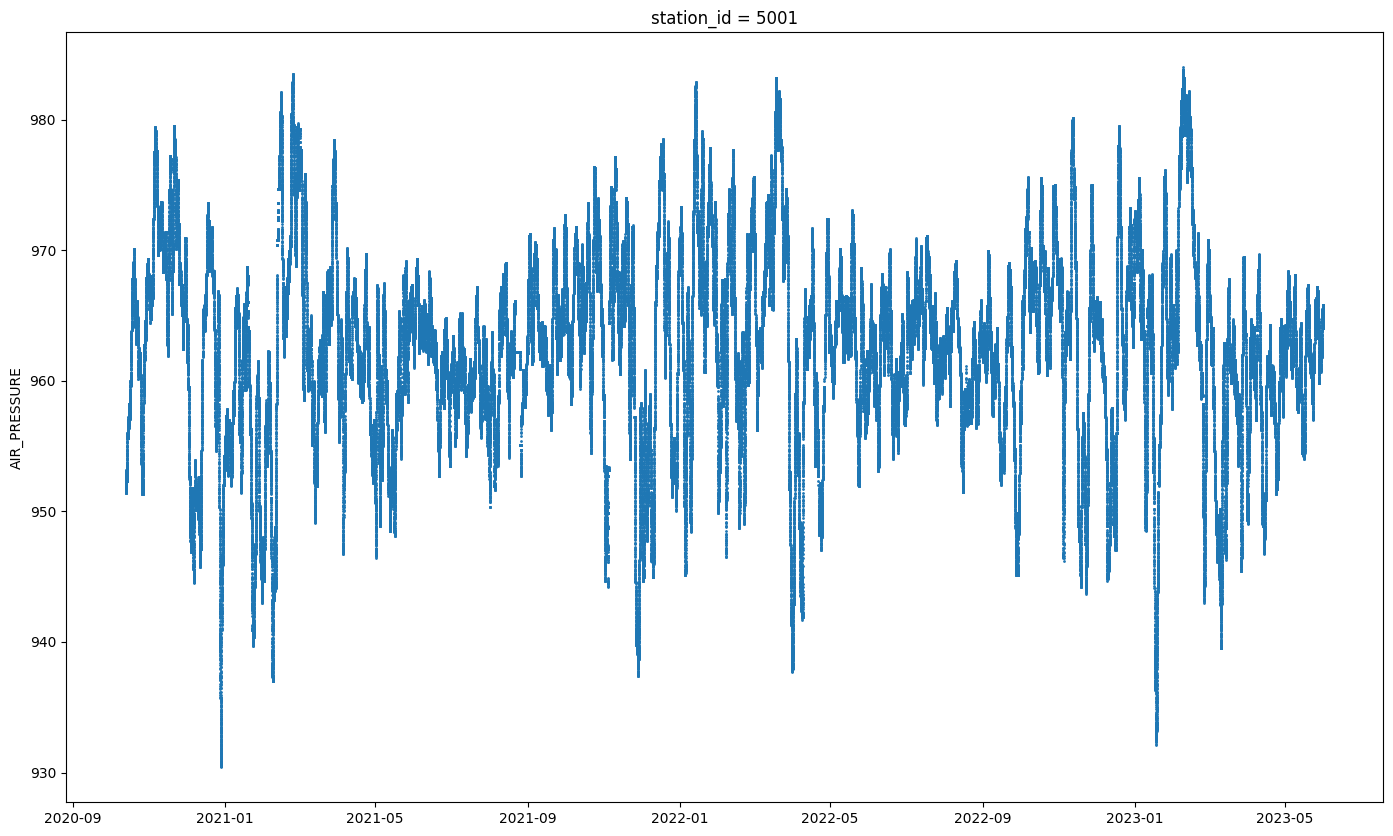

In [4]:
# plot 'AIR_PRESSURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(air_pressure_all.index, air_pressure_all['AIR_PRESSURE'],s=1)
ax.set_ylabel('AIR_PRESSURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

                           AIR_PRESSURE
2020-10-13 10:00:00+00:00    952.762500
2020-10-13 11:00:00+00:00    952.366667
2020-10-13 12:00:00+00:00    951.783333
2020-10-13 13:00:00+00:00    951.691667
2020-10-13 14:00:00+00:00    951.508333
...                                 ...
2023-05-31 17:00:00+00:00    964.141667
2023-05-31 18:00:00+00:00    964.275000
2023-05-31 19:00:00+00:00    964.991667
2023-05-31 20:00:00+00:00    965.066667
2023-05-31 21:00:00+00:00    964.900000

[23052 rows x 1 columns]


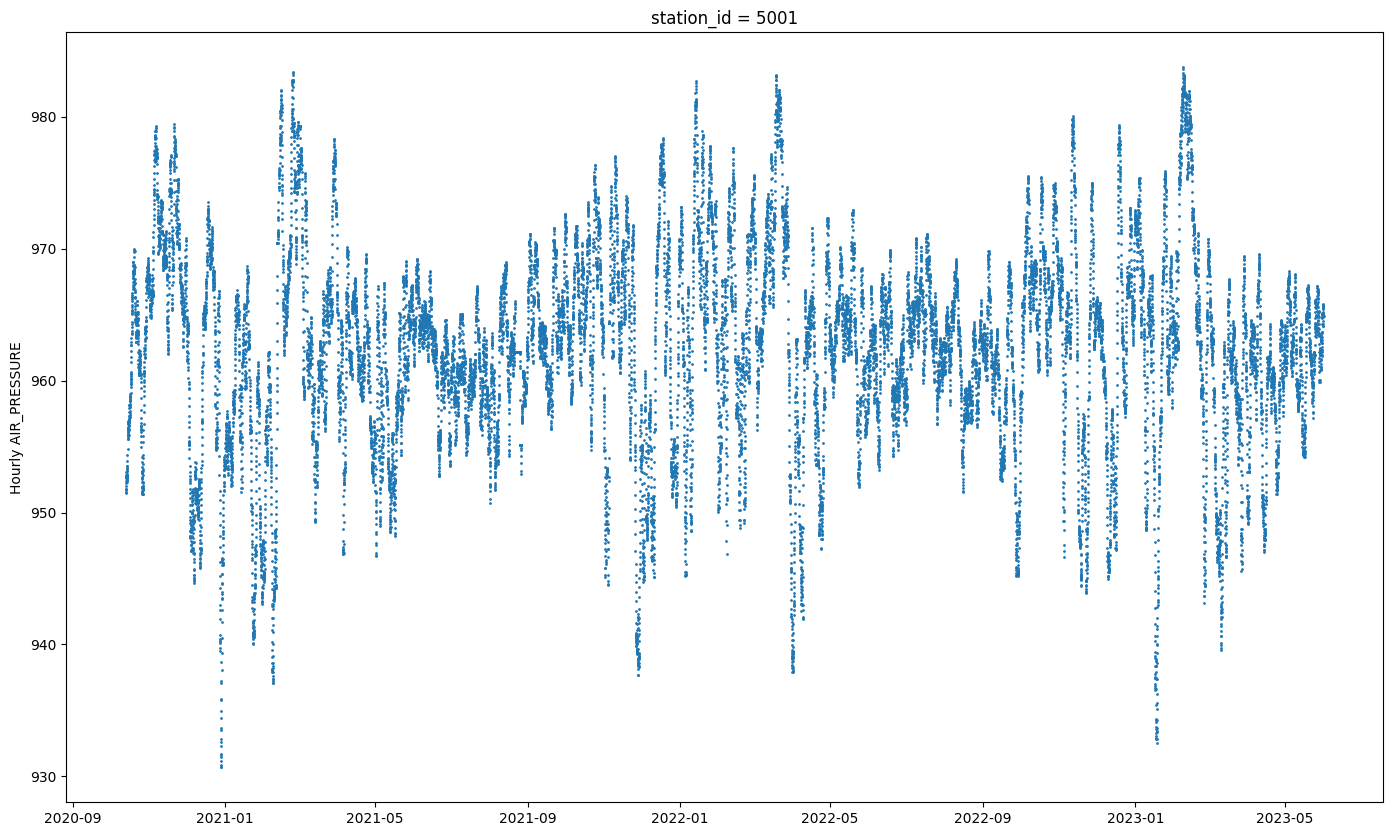

In [5]:
# hourly data
# sum the values for each hour and take the mean

str(air_pressure_all.index.dtype) # okay
air_pressure_hourly = air_pressure_all.resample('H').mean()
print(air_pressure_hourly)

# plot hourly 'AIR_PRESSURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(air_pressure_hourly.index, air_pressure_hourly['AIR_PRESSURE'],s=1)
ax.set_ylabel('Hourly AIR_PRESSURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

In [6]:
# 2020 and 2021

air_pressure_20_21 = air_pressure_all.loc[(air_pressure_all.index.year == 2020) | (air_pressure_all.index.year == 2021) , 'AIR_PRESSURE']
print(air_pressure_20_21)

2020-10-13 10:20:00+00:00    952.8
2020-10-13 10:25:00+00:00    952.8
2020-10-13 10:30:00+00:00    952.8
2020-10-13 10:35:00+00:00    952.8
2020-10-13 10:40:00+00:00    952.8
                             ...  
2021-12-31 23:35:00+00:00    968.9
2021-12-31 23:40:00+00:00    968.8
2021-12-31 23:45:00+00:00    968.9
2021-12-31 23:50:00+00:00    968.9
2021-12-31 23:55:00+00:00    969.0
Freq: 5T, Name: AIR_PRESSURE, Length: 128036, dtype: float64


In [7]:
# hourly data 2020, 2021
# sum the values for each hour and take the mean

str(air_pressure_20_21.index.dtype) # okay
air_pressure_20_21_hourly = air_pressure_20_21.resample('H').mean()
print(air_pressure_20_21_hourly)

2020-10-13 10:00:00+00:00    952.762500
2020-10-13 11:00:00+00:00    952.366667
2020-10-13 12:00:00+00:00    951.783333
2020-10-13 13:00:00+00:00    951.691667
2020-10-13 14:00:00+00:00    951.508333
                                ...    
2021-12-31 19:00:00+00:00    968.233333
2021-12-31 20:00:00+00:00    968.583333
2021-12-31 21:00:00+00:00    969.258333
2021-12-31 22:00:00+00:00    969.966667
2021-12-31 23:00:00+00:00    969.058333
Freq: H, Name: AIR_PRESSURE, Length: 10670, dtype: float64


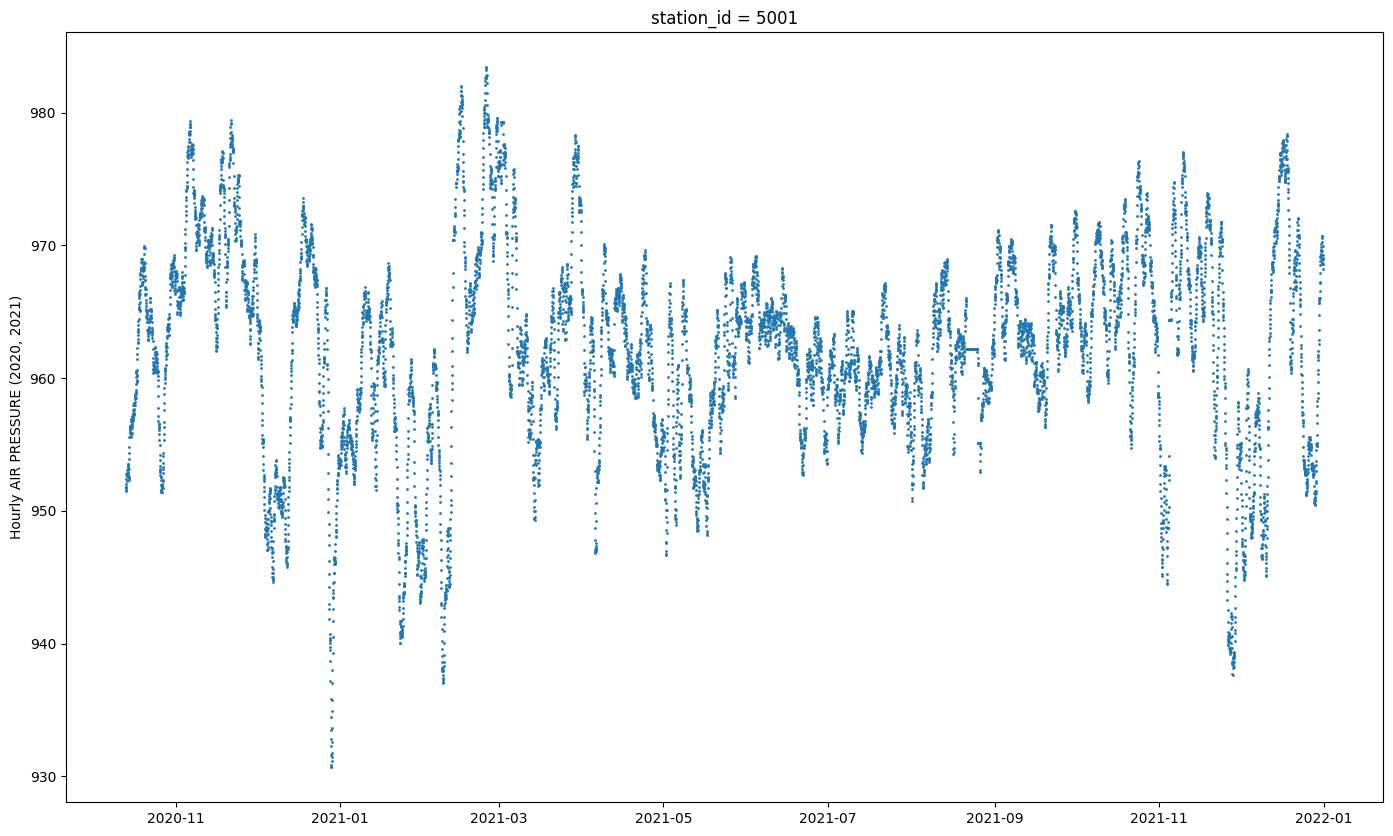

In [8]:
# plot hourly 'AIR_PRESSURE' for 2020 and 2021
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(air_pressure_20_21_hourly.index, air_pressure_20_21_hourly, s=1)
ax.set_ylabel('Hourly AIR PRESSURE (2020, 2021)')
ax.set_title(f'station_id = {station_id}')  
plt.show()

         Order          AIC          BIC
174  (7, 0, 6)  2873.282806  2982.410676
133  (5, 1, 5)  2887.314078  2967.340152
111  (4, 1, 7)  2909.000920  2996.302092
183  (7, 1, 7)  2919.612294  3028.738758
110  (4, 1, 6)  2939.727100  3019.753174
Best ARIMA order: (7, 0, 6)
                               SARIMAX Results                                
Dep. Variable:           AIR_PRESSURE   No. Observations:                10670
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -1421.641
Date:                Fri, 17 May 2024   AIC                           2873.283
Time:                        02:10:11   BIC                           2982.411
Sample:                    10-13-2020   HQIC                          2910.103
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

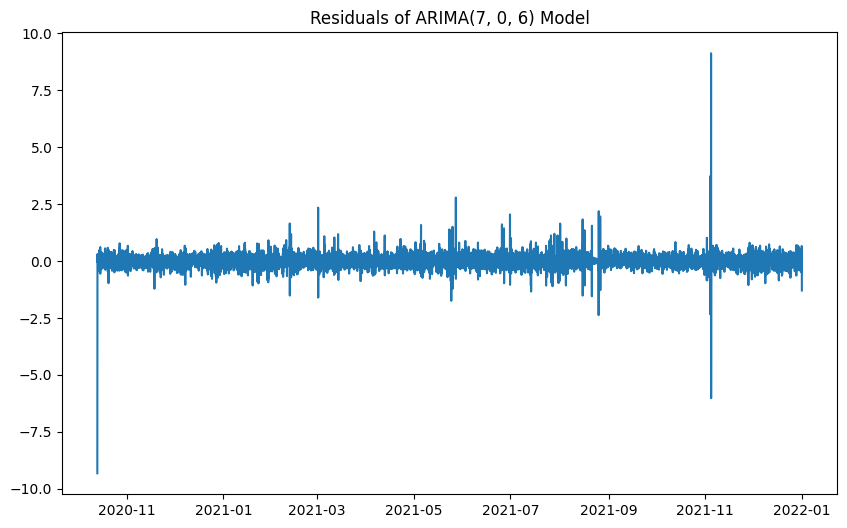

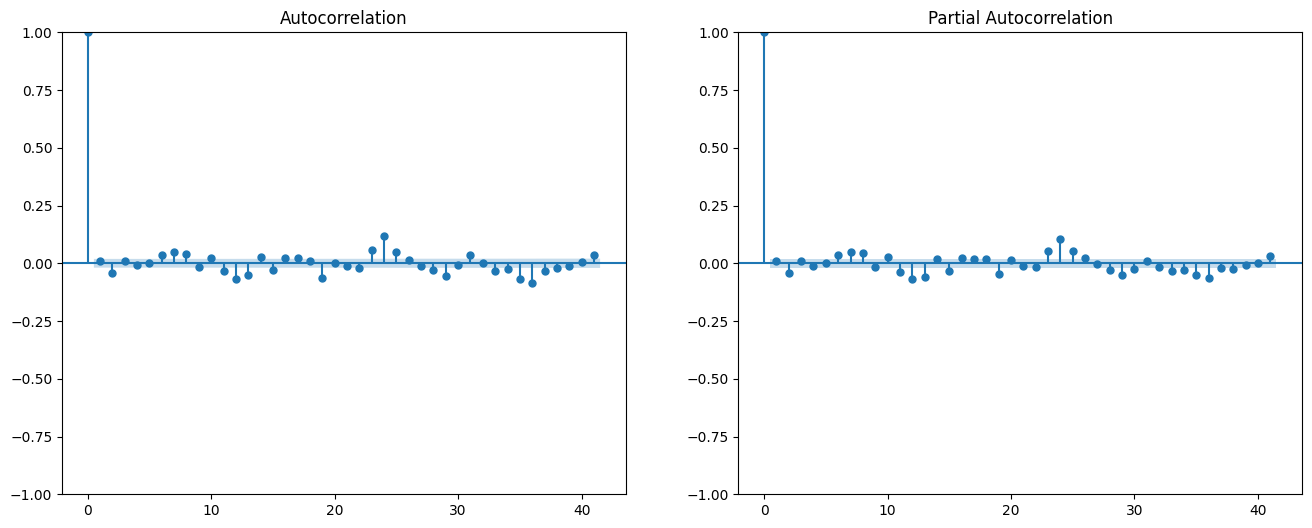

In [9]:
# fitting ARIMA

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# define the range for p, d, q parameters
p = range(0, 8)
d = range(0, 3)
q = range(0, 8)

# a list to store the results
results = []

# Perform grid search
for i in p:
    for j in d:
        for k in q:
            order = (i, j, k)
            try:
                model = ARIMA(air_pressure_20_21_hourly, order=order)
                fit = model.fit()
                aic = fit.aic
                bic = fit.bic
                results.append((order, aic, bic))
            except:
                continue

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Order', 'AIC', 'BIC'])

# Sort the results by AIC and BIC
results_df = results_df.sort_values(by='AIC')

# Print the top 5 models
print(results_df.head())

# Choose the best model based on the lowest AIC
best_order = results_df.iloc[0]['Order']
print(f"Best ARIMA order: {best_order}")

# Fit the best model
best_model = ARIMA(air_pressure_20_21_hourly, order=best_order)
best_fit = best_model.fit()

# Check the summary of the best model
print(best_fit.summary())

# Residuals of the best model
residuals_best = best_fit.resid

# Plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best)
plt.title(f'Residuals of ARIMA{best_order} Model')
plt.show()

# Plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best, ax=ax[0])
plot_pacf(residuals_best, ax=ax[1])
plt.show()

In [ ]:
# fit the ARIMA model
model = ARIMA(air_pressure_20_21_hourly, order=(1,1,1))
fit = model.fit()

# plot

In [ ]:
# forecast with ARIMA

# forecast the next 6 hours
forecast_steps = 6
forecast = fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=air_pressure_20_21_hourly.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(air_pressure_20_21_hourly, label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('AIR_PRESSURE')
plt.title('ARIMA forecast for the next 6 Hours')
plt.legend()
plt.show()

# print the forecasted values and confidence intervals
print("Forecasted values:")
print(forecast_values)
print("\nConfidence intervals:")
print(forecast_conf_int)

We will compare the best fitting ARIMA model forecast with a forecast from a simple model. This model will forecast the values of the next six hours based on historical averages. It will take the average of the previous six days at the same time steps. The hope is, that the ARIMA model's forecast is better than the simple model's. We will compare both to the actual measurement at that times.

In [ ]:
# simple model
def simple_model_forecast(series, steps=6, days=3):
    last_time = series.index[-1]
    forecast_index = pd.date_range(start=last_time + pd.Timedelta(hours=1), periods=steps, freq='H')
    forecast_values = []
    for hour in range(1, steps + 1):
        same_hour_values = []
        for day in range(1, days + 1):
            past_time = last_time - pd.Timedelta(hours=(24 * day - hour))
            if past_time in series.index:
                same_hour_values.append(series[past_time])
        forecast_values.append(np.mean(same_hour_values))
    return pd.Series(forecast_values, index=forecast_index)

simple_forecast_values = simple_model_forecast(air_pressure_20_21_hourly)

print(simple_forecast_values)